In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-traffic-android-malware/android_traffic.csv


**Import the necessary libraries:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score

**Load the dataset using pandas:**

In [3]:
data = pd.read_csv("../input/network-traffic-android-malware/android_traffic.csv",sep=";")

**Replace NaN values with 0**

In [4]:
data = data.fillna(0)

In [5]:
data.head()

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,0.0,0.0,0.0,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,0.0,0.0,0.0,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,0.0,0.0,0.0,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,0.0,0.0,0.0,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,0.0,0.0,0.0,7,1,benign


**Create a new DataFrame that does not have a 'type' column.**

In [6]:
X = data.drop('type', axis=1)
print(X)

           name  tcp_packets  dist_port_tcp  external_ips  vulume_bytes  \
0     AntiVirus           36              6             3          3911   
1     AntiVirus          117              0             9         23514   
2     AntiVirus          196              0             6         24151   
3     AntiVirus            6              0             1           889   
4     AntiVirus            6              0             1           882   
...         ...          ...            ...           ...           ...   
7840      Zsone            0              0             0             0   
7841      Zsone            4              4             1           296   
7842      Zsone            0              0             0             0   
7843      Zsone            0              0             0             0   
7844      Zsone            0              0             0             0   

      udp_packets  tcp_urg_packet  source_app_packets  remote_app_packets  \
0               0     

In [7]:
y = data['type']
print(y)

0          benign
1          benign
2          benign
3          benign
4          benign
          ...    
7840    malicious
7841    malicious
7842    malicious
7843    malicious
7844    malicious
Name: type, Length: 7845, dtype: object


**Change a string column to numeric:**

In [8]:
from sklearn.preprocessing import LabelEncoder

X = pd.get_dummies(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

**Split the dataset into training and testing sets:**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train the Logistic Regression model:**

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Predict the test set results:**

In [11]:
y_pred = model.predict(X_test)

**Evaluate the model:**

In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score:{roc_auc}')

Accuracy: 0.6832377310388783
Precision: 0.7768595041322314
Recall: 0.2979397781299525
F1 Score: 0.4306987399770905
ROC AUC Score:0.6742757798059735


**Menampilkan Confusion Matrix**

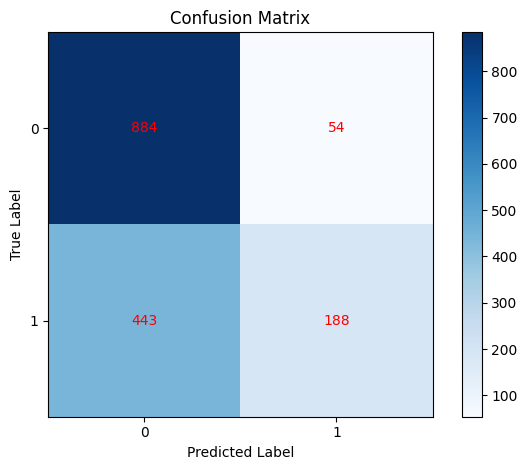

In [13]:
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Adding text to the confusion matrix
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

classes = np.unique(y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

**Receiver Operating Characteristic (ROC) Curve**

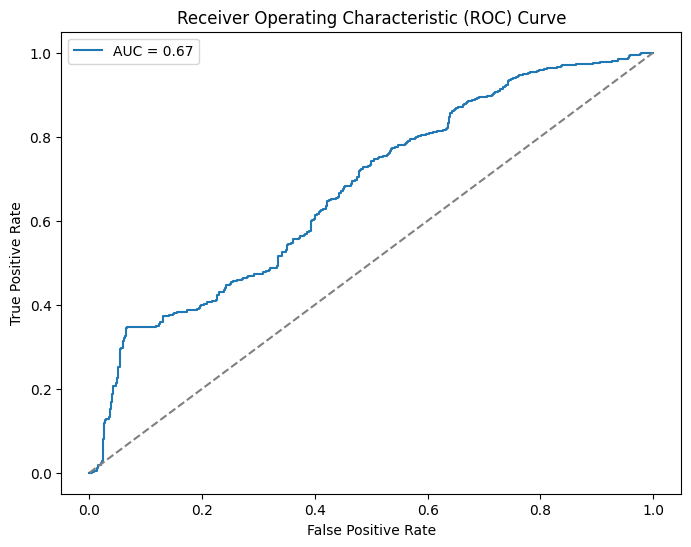

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

# Menilai kemungkinan prediksi pada data uji
y_prob = model.predict_proba(X_test)[:, 1]

# Menghitung nilai TPR (True Positive Rate), FPR (False Positive Rate), dan threshold
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

# Menghitung nilai AUC (Area Under Curve)
area_under_curve = roc_auc_score(y_test, y_prob)

# Plot kurva ROC (Receiver Operating Characteristic)
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label=f'AUC = {area_under_curve:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


**Precision-Recall Curve**

In [15]:
# Menghitung nilai precision, recall, dan threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Menghitung nilai Average Precision (AP)
ap = average_precision_score(y_test, y_prob)
print(f"Average Precision (AP): {ap:.4f}")

Average Precision (AP): 0.5725


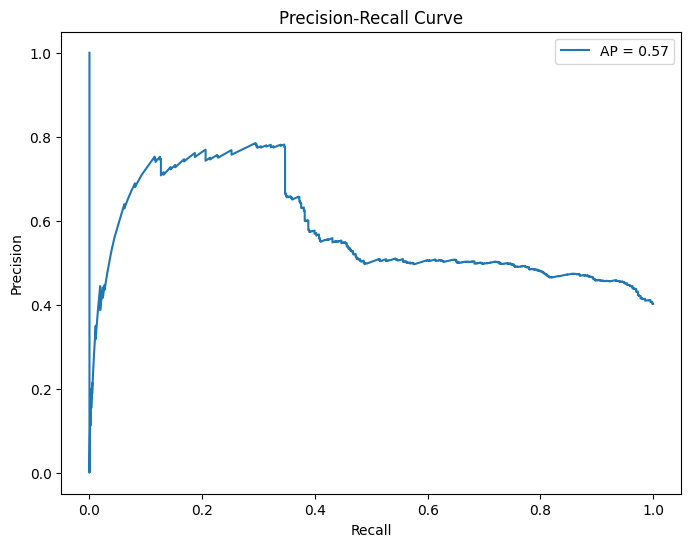

In [16]:
# Menghitung nilai precision, recall, dan threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Menghitung nilai Average Precision (AP)
ap = average_precision_score(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [17]:
import pandas as pd
from IPython.display import display, HTML

# Create the DataFrame
data = pd.DataFrame({
  "Status": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC Score"],
  "Value": [0.6832377310388783, 0.7768595041322314, 0.2979397781299525, 0.4306987399770905, 0.6742757798059735]
})

df = pd.DataFrame(data, columns=['Status', 'Value'])
display(df)

,Status,Value
0,Accuracy,0.683238
1,Precision,0.776860
2,Recall,0.297940
3,F1 Score,0.430699
4,ROC AUC Score,0.674276
